In [8]:
from ckanapi import RemoteCKAN
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from pandas.io.json import json_normalize

ua = 'avoindata_ckanapi_example/1.0 ({0})'
ckan = RemoteCKAN('https://beta.avoindata.fi/data/fi/', user_agent=ua)
packages = ckan.action.package_search(q='Kansaneläkelaitos', fq = 'title:yksityisistä sairaanhoito')
resources = packages['results'][0]['resources'] 
url_csv = resources[0]['url']
url_json = resources[1]['url']
dat = pd.read_csv(url_csv, sep = ';', decimal = ',')

In [9]:
response = urlopen(url_json)
meta = json.loads(response.read())

## Datan ja metadatan kuvailu

**Datan kuvaustieto**

In [10]:
print(meta['description'])

Raportti sisältää tietoja sairausvakuutuksesta lääkärinpalkkioina, hammaslääkärinpalkkioina tai tutkimuksena ja hoitona korvatuista yksityisistä sairaanhoitopalveluista perittyjen maksujen keskiarvoista toimenpiteittäin. - Tiedot on raportoitu kunnittain ja useiden laajempien aluejaottelujen mukaan vuositasolla. - Kunta on palvelusta tilastovuonna korvauksen saaneen henkilön asuinkunta vuoden lopussa. - Toimenpide on tilastoitu sille vuodelle, jona siitä on maksettu korvaus. - Kustannukset on jaoteltu seuraaviin ryhmiin: erikoislääkäri- (yleisimmät erikoisalat), yleislääkäri-, hammaslääkärikäynnit, tutkimus ja hoito sekä yleisimmät laboratorio- ja röntgentutkimukset. - Tarkastelussa ei ole mukana seuraavia alaryhmiä: lääketieteen opiskelijat, ulkomaalaiset lääkärit, normaalin vastaanottoajan ulkopuolella tehdyt käynnit, kotikäynnit sekä jos yksittäisten käyntien/hoitojen lukumäärä on kunnassa vähemmän kuin neljä. - Aineistosta on poistettu virheelliset tiedot ennen keskiarvojen laskemi

**Datan muuttujatieto**

In [11]:
json_normalize(meta['resources'][0]['schema']['fields'])

,format,name,type
0,default,kuntanumero,integer
1,default,kunta,string
2,default,aikajakso,string
3,default,aika,integer
4,default,toimenpide,string
5,default,hinta_euroa,integer


**Datan ensimmäiset rivit**

In [12]:
print(dat.head())

   kuntanumero      kunta aikajakso  aika  \
0            5   Alajärvi     vuosi  2010   
1            9  Alavieska     vuosi  2010   
2           10     Alavus     vuosi  2010   
3           16   Asikkala     vuosi  2010   
4           18     Askola     vuosi  2010   

                                          toimenpide  hinta_euroa  
0  Yleislääkärit, vastaanottokäynti enintään 20 min.         42.0  
1  Yleislääkärit, vastaanottokäynti enintään 20 min.         50.0  
2  Yleislääkärit, vastaanottokäynti enintään 20 min.         46.0  
3  Yleislääkärit, vastaanottokäynti enintään 20 min.         49.0  
4  Yleislääkärit, vastaanottokäynti enintään 20 min.         43.0  


In [14]:
plotdat = (dat
           .query('aikajakso == "vuosi"')
           .query('toimenpide == "SAA02 Hammaslääkärit, perustutkimus"')
 .query('aika == "2018"')
 .sort_values(by='hinta_euroa', ascending=False)
 .head(20))

#plt.bar(plotdat, height = )

## Kuvio

<BarContainer object of 20 artists>

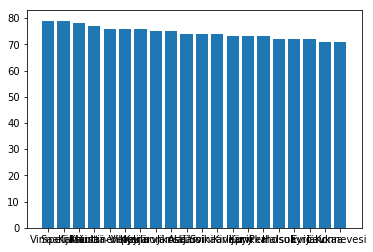

In [16]:
plt.bar(plotdat['kunta'], plotdat['hinta_euroa'])

## Datastore-api

Jos et tarvitse koko aineistoa, voit suodattaa siitä osio SQL:llä käyttäen CKAN:n DataStore-rajapintaa.

Alla olevassa esimerkissä tehdään rajaus `kunta`-muuttujasta ja siis etsitään vaan kuntaa *Veteli* koskevat tiedot.

In [17]:
kunta = "Veteli"
taulu = resources[0]['id']
muuttuja = 'kunta'
urli = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}" WHERE {muuttuja} LIKE \'{kunta}\''
urli_plain = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}"'
#urli = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\" WHERE %s LIKE '%s'" % (taulu, muuttuja, kunta)
#urli_plain = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\"" % (taulu)
response = urlopen(urli_plain)
da = json.loads(response.read())
dataa = json_normalize(da['result']['records'])
#dataa
print(dataa.head())

                                          _full_text  _id  aika aikajakso  \
0  '20':8 '2010':4 '42':10 '5':1 'alajärvi':2 'en...    1  2010     vuosi   
1  '20':8 '2010':4 '50':10 '9':1 'alavieska':2 'e...    2  2010     vuosi   
2  '10':1 '20':8 '2010':4 '46':10 'alavus':2 'eni...    3  2010     vuosi   
3  '16':1 '20':8 '2010':4 '49':10 'asikkala':2 'e...    4  2010     vuosi   
4  '18':1 '20':8 '2010':4 '43':10 'askola':2 'eni...    5  2010     vuosi   

  hinta_euroa      kunta kuntanumero  \
0          42   Alajärvi           5   
1          50  Alavieska           9   
2          46     Alavus          10   
3          49   Asikkala          16   
4          43     Askola          18   

                                          toimenpide  
0  Yleislääkärit, vastaanottokäynti enintään 20 min.  
1  Yleislääkärit, vastaanottokäynti enintään 20 min.  
2  Yleislääkärit, vastaanottokäynti enintään 20 min.  
3  Yleislääkärit, vastaanottokäynti enintään 20 min.  
4  Yleislääkärit, vas